# <center>GRIP - The Spark Foundation</center>
<img src='https://media.glassdoor.com/sqll/2143300/the-sparks-foundation-squarelogo-1556515236044.png' width="100" height="100">

### <center><font color=7E4456>Data Science and Business Analytics Internship</font></center>  
### <center><font color=7E4456>By Khushboo Hiten Lodaya</font></center>

<font color=155E64>Prediction using Unsupervised ML</font>

<font color=155E64>(Level - Beginner)</font>

<font color=155E64>Task 2 : K-mean Clustering</font>

<font color=155E64>Problem Statement: predict the optimum number of clusters
and represent it visually</font>

### Importing all the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Importing data and converting into dataframe

In [3]:
df = datasets.load_iris()
df = pd.read_csv('Iris.csv')
iris = df.drop('Id', axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
x = iris.iloc[:, [0, 1, 2, 3]].values
#x

In [73]:
# Showing the count of each species in the iris dataset.
iris_species = pd.crosstab(index=iris["Species"],  
                              columns="count")     
iris_species

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## Visualisation of Data

C:\Users\91961\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


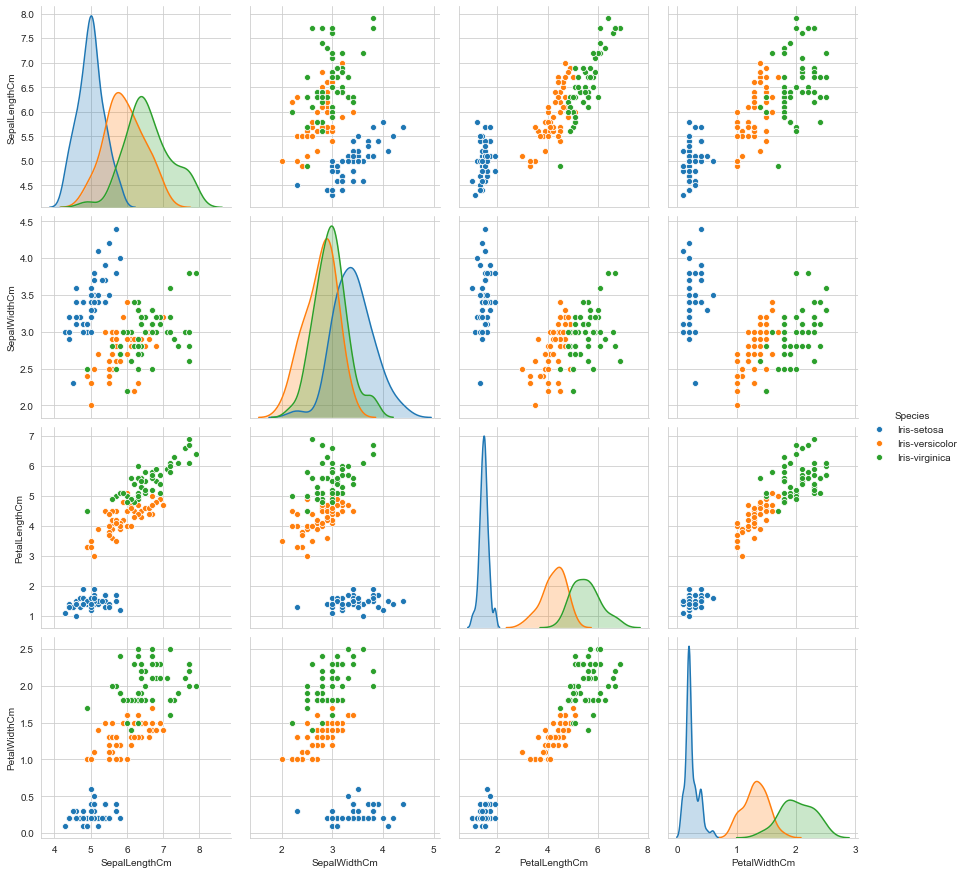

In [76]:
# using pairplot - which is a matrix of plots of given two variables giving us pairwise relationship between two variables.
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Species",size=3);
plt.show()

- In all the above plots its clear that the species - Iris Setosa is independent and clear cluster can be seen, However Iris Virginica and Iris Versicolor are overlapping on each other.

- There is also a positive relationship between Petal length and Petal width column.

## Finding the optimal number of clusters

In [83]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300)
    km.fit(x)
    wcss.append(km.inertia_)

## Using the elbow method to determine the optimal number of clusters for k-means clustering

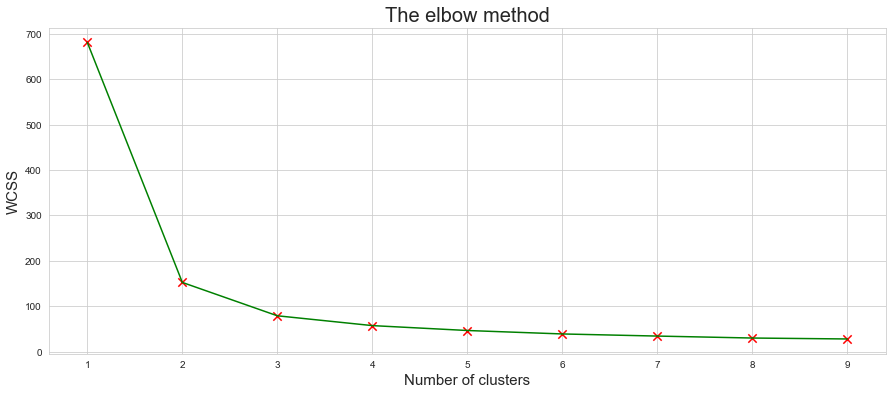

In [84]:
plt.figure(figsize=(15,6))
plt.scatter(range(1, 10), wcss,marker="x",c="red", s=70)  
plt.plot(range(1, 10), wcss, c='green')
plt.title('The elbow method', size=20)
plt.xlabel('Number of clusters', size=15)
plt.ylabel('WCSS', size=15)
plt.show()

- The optimum clusters is where the elbow occurs. We can see the elbow curve is between 2 and 3 and after 3 the inertia decreases in linear fashion. So we select k=3.

In [88]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, 
               precompute_distances = 'auto', tol = 0.0001, verbose = 0)
y_km = km.fit_predict(x)
y_km #predicted values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

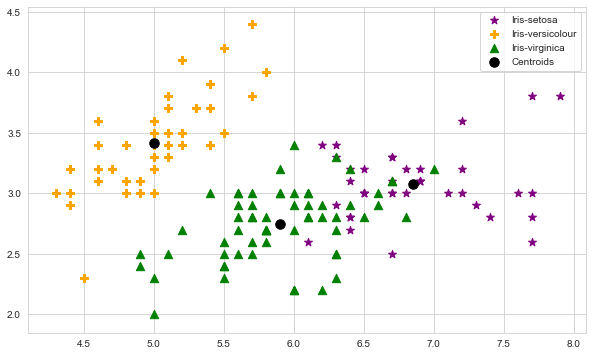

In [89]:
#Visualising the clusters
sns.set_style("whitegrid");
plt.figure(figsize=(10,6))
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 70, c = 'purple', label = 'Iris-setosa',marker="*")
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 70, c = 'orange', label = 'Iris-versicolour',marker="P")
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 70, c = 'green', label = 'Iris-virginica',marker="^")

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 90, c = 'black', label = 'Centroids')

plt.legend()

- Thus we have successfully implemented K-means clustering algorithm 